**Exploración de datos EDA**



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
DIR = "/content/drive/MyDrive/"
os.chdir(DIR)

In [21]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [6]:
df = pd.read_excel("ENB2012_data.xlsx")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# Análisis descriptivo

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
##Porcentaje valores faltantes por columna
df.isna().mean() * 100

,0
X1,0.0
X2,0.0
X3,0.0
X4,0.0
X5,0.0
X6,0.0
X7,0.0
X8,0.0
Y1,0.0
Y2,0.0


In [9]:
# Primero identificamos cantidad de valores únicos por columna, ya que las que tienen un solo valor único o todos los valores diferentes no serán útiles en análisis y deberían eliminarse antes del EDA.
df.nunique()

,0
X1,12
X2,12
X3,7
X4,4
X5,2
X6,4
X7,4
X8,6
Y1,587
Y2,636


In [11]:
##Descriptivas de variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [12]:
# Calculamos la asimetría para las variables numéricas
df.skew()

,0
X1,0.495513
X2,-0.125131
X3,0.533417
X4,-0.162764
X5,0.000000
X6,0.000000
X7,-0.060254
X8,-0.088689
Y1,0.360446
Y2,0.395992


In [13]:
# Calculamos curtosis para las variables numéricas
df.kurt()

,0
X1,-0.706568
X2,-1.059454
X3,0.116593
X4,-1.776947
X5,-2.005229
X6,-1.361042
X7,-1.327629
X8,-1.148709
Y1,-1.245569
Y2,-1.147190


In [14]:
# Se hace una lista de variables numéricas y otra de categóricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

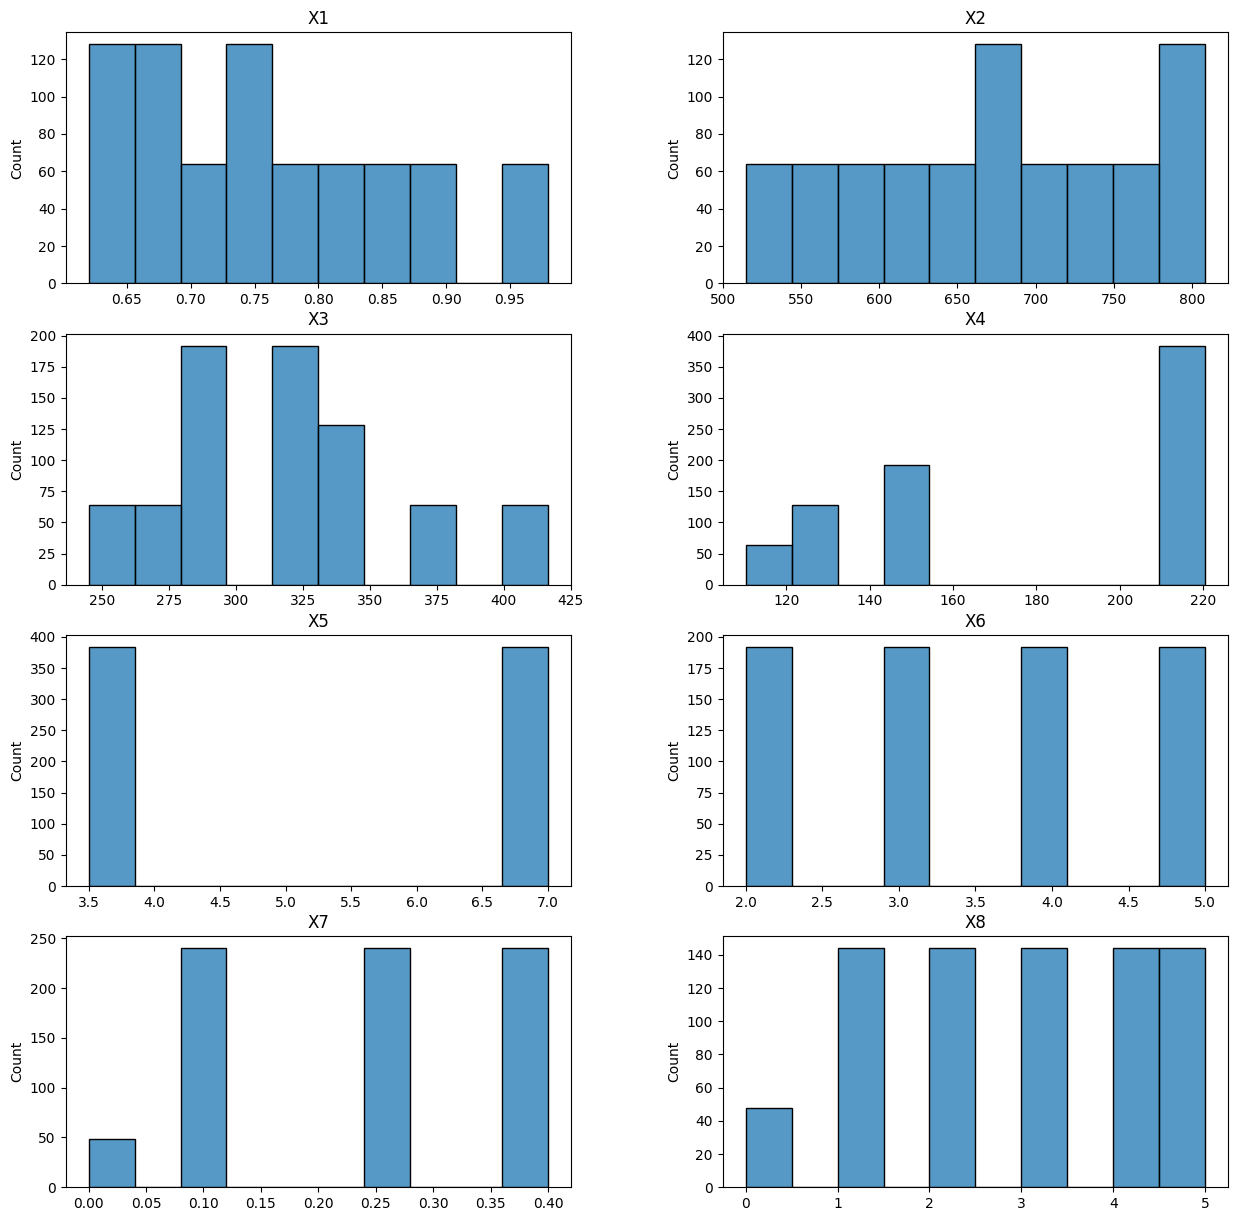

In [15]:
# Se dibujan histogramas combinando Matplotlib y Seaborn para ver la distribución de los valores para cada variable

fig, axes = plt.subplots(4,2, figsize=(15,15)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(df[num_cols], axes):
  sns.histplot(x=df[col], ax=ax, bins=10) # ---> Seaborn
  ax.set(title=f'{col}', xlabel=None) # ---> Matplotlib

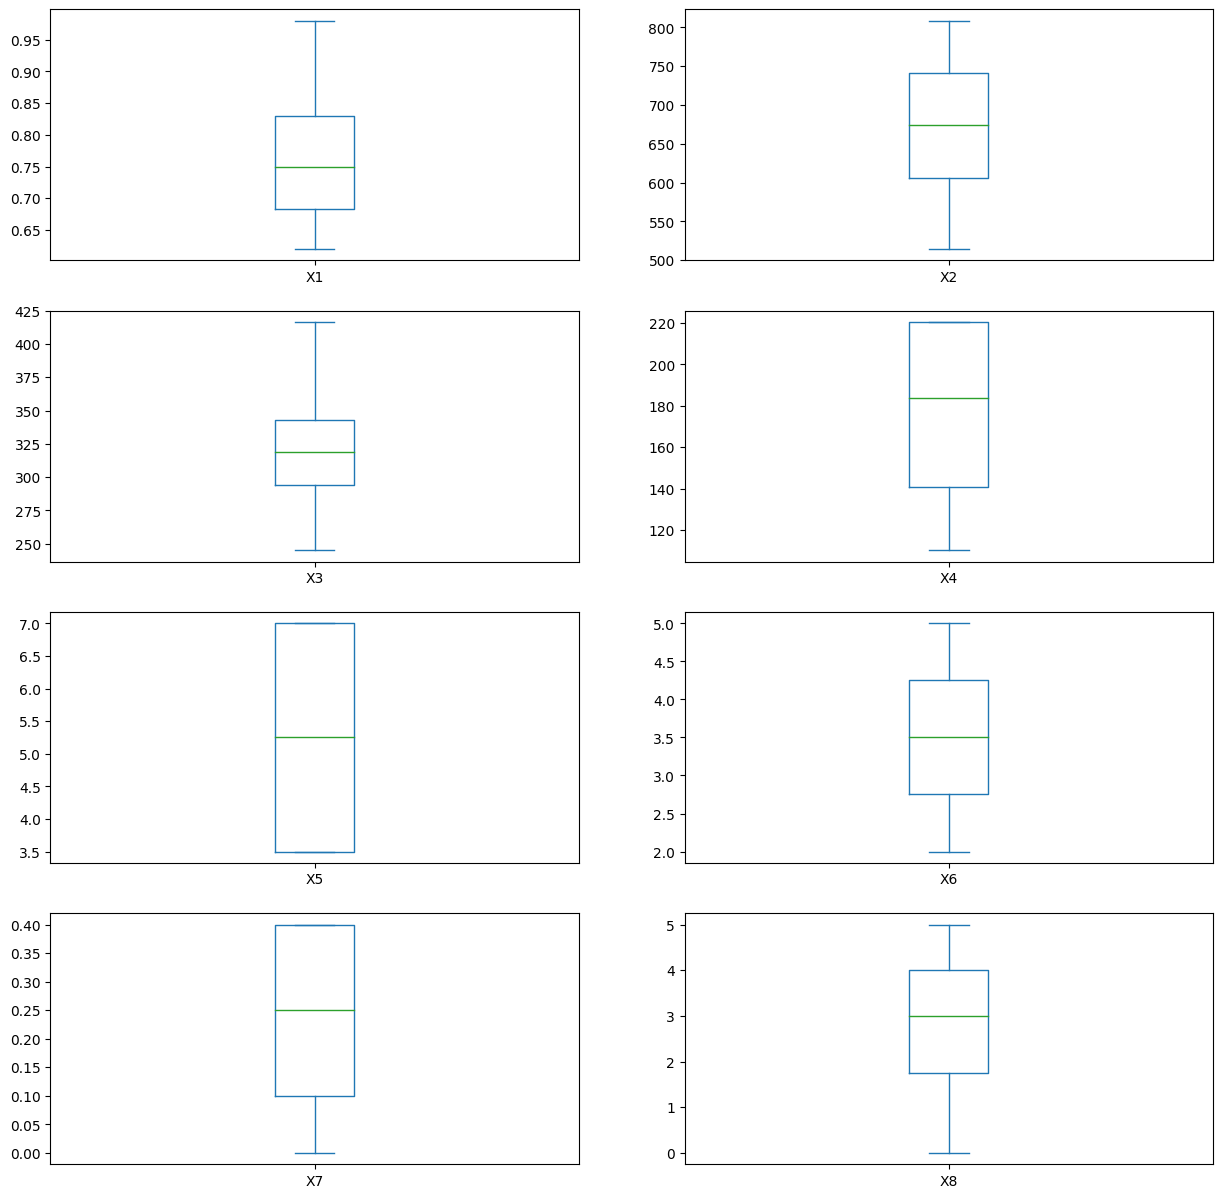

In [16]:
# Se grafica diagramas de caja para ver distribución de los datos

fig, axes = plt.subplots(4,2, figsize=(15,15))
axes = axes.ravel()
for col, ax in zip(df[num_cols], axes):
  df[col].plot(kind='box', ax=ax) # ---> Pandas

<Axes: xlabel='X7', ylabel='count'>

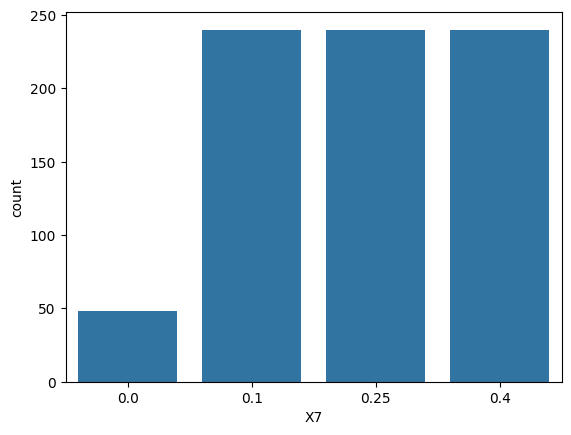

In [18]:
## Gráfico de barras para la variable X7 para ver la frecuencia de cada categoría:
sns.countplot(x='X7', data=df)

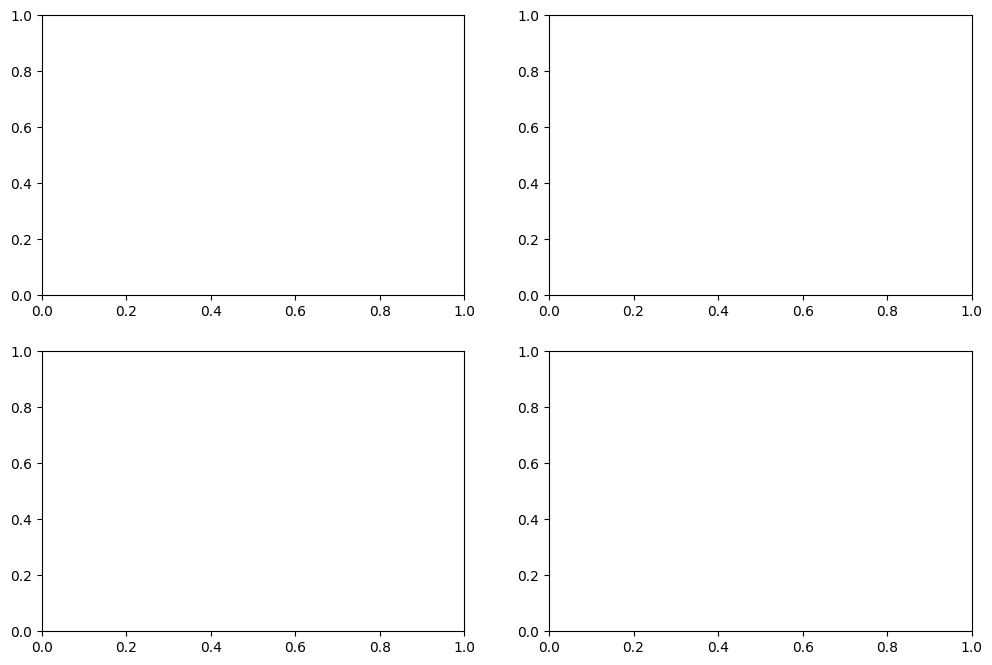

In [19]:
## Utilizamos un for para diagramar el gráfico de barras para todas las variables categóricas
fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.ravel()
for col, ax in zip(df[cat_cols], axes):
  sns.countplot(x=df[col], ax=ax) # ---> Seaborn
  ax.set(title=f'{col}', xlabel=None)

<Axes: >

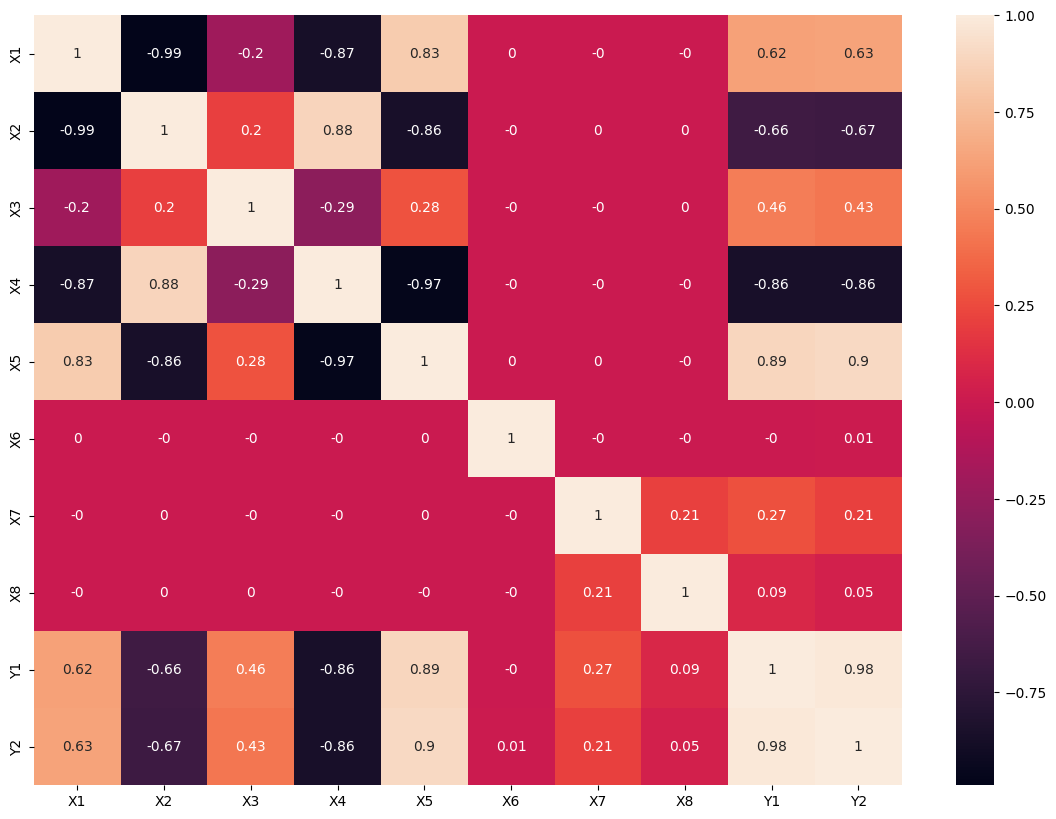

In [20]:
## Diagramamos mapa de calor para ver la correlación de las variables
plt.figure(figsize = (14, 10))
sns.heatmap(round(df.corr(numeric_only=True),2), annot = True) # ---> Seaborn